# Feature Engineering

## What are features?  

Data comes to us in multiple forms – as audio files, images, logs, time series, categories, GPS coordinates, numbers, tweets, text and so on.  Most raw data has to be transformed into something usable by algorithms.  This ‘something’ represents features.

A feature is a numeric representation of data.  

Features are derived from data, and are expressed as numbers.  

Feature engineering involves creating the right feature set from available data that is fit-for-purpose for our modeling task (which is to get to the target variable, using other independent variables or attributes).

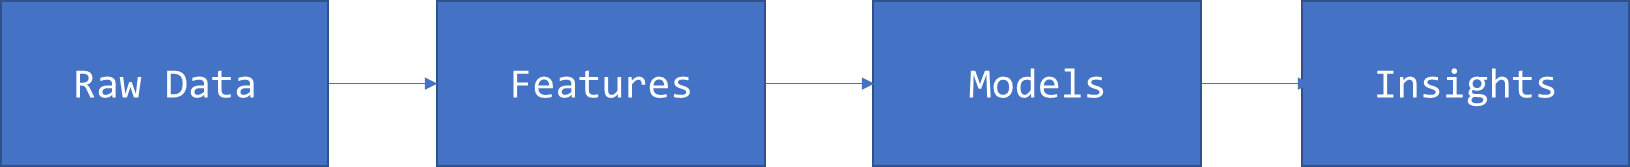  


## Feature engineering for numeric data
When raw data is already numeric, it sometimes can be used directly as an input to our models.  

However often additional transformations are required to extract useful information from the data.  Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. (Source: Wikipedia)

Next, we will discuss common tools available for engineering features from numeric raw data.  These are transformations applied to data to convert them into a form that better fits our needs.

## What we will cover
 - Binning 
 - Log Transformations
 - Box-Cox
 - Standardization and Normalization
 - Categorical to Numeric
 - Imbalanced Data
 - Principal Component Analysis

Next, let us launch straight into each of these.  We will cover the conceptual ground first, and then demonstrate the idea through code.

**Usual library imports first...**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Binning

In binning, we split our data into multiple bins, or buckets, and assign each observation to a limited number of bins.  These bin assignments are then used as the feature set.

Consider our diamonds dataset, and the distribution of diamond prices.

### Fixed width binning

In fixed width binning, the entire range of observations is divided across a set number of bins.

For example, we could split each diamond into one of 4 equally sized bins.

We can replace the interval notation with labels we assign ourselves.

You can cut the data into a number of fixed bins using `pd.qcut`.  You can specify your own cut-offs for the bins as a list.    
Note the interval notation.  `(` means not-inclusive, and `]` means inclusive.  

For example:  
Assuming integers:  
```
(0, 3) = 1, 2
(0, 3] = 1, 2, 3, 4, 5
[0, 3) = 0, 1, 2
[0, 3] = 0, 1, 2, 3
```

**Load the diamonds dataset**  

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
print('Shape:',diamonds.shape)
diamonds.sample(4)

Shape: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
19907,1.53,Very Good,G,SI2,62.1,61.0,8455,7.28,7.30,4.53
51747,0.71,Ideal,E,SI1,61.9,56.0,2404,5.76,5.71,3.55
8269,0.90,Very Good,D,SI1,61.5,58.0,4381,6.15,6.21,3.80
8152,1.01,Ideal,H,SI2,61.7,56.0,4357,6.41,6.46,3.97


In [4]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

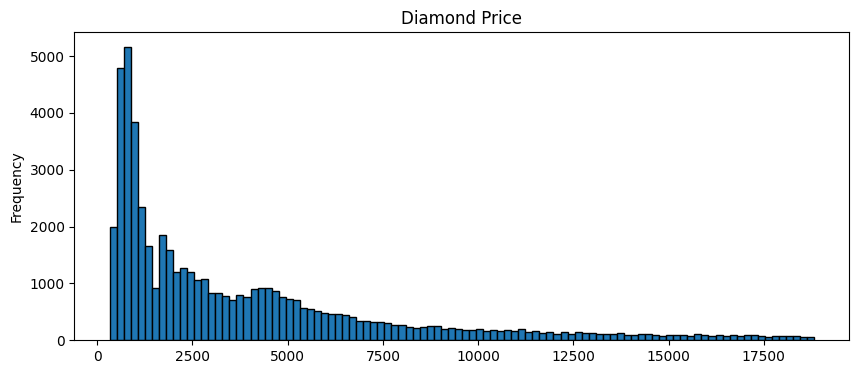

In [5]:
diamonds.price.plot(kind='hist', bins = 100, figsize = (10,4), edgecolor='black', title='Diamond Price');
plt.show()
# diamonds.price.plot(kind='hist', bins = 100, figsize = (10,4), logx = True, logy=True, edgecolor='black', title='Log Price');

In [6]:
pd.cut(diamonds.price, bins = 5)

0        (307.503, 4025.4]
1        (307.503, 4025.4]
2        (307.503, 4025.4]
3        (307.503, 4025.4]
4        (307.503, 4025.4]
               ...        
53935    (307.503, 4025.4]
53936    (307.503, 4025.4]
53937    (307.503, 4025.4]
53938    (307.503, 4025.4]
53939    (307.503, 4025.4]
Name: price, Length: 53940, dtype: category
Categories (5, interval[float64, right]): [(307.503, 4025.4] < (4025.4, 7724.8] < (7724.8, 11424.2] < (11424.2, 15123.6] < (15123.6, 18823.0]]

### Custom bins

Alternatively, we can use custom bins.

Assume from our domain knowledge we know that diamonds up to \\$2,500 are purchased by a certain category of customers, and those that are priced over \\$2,500 are targeted at a different category.

We can set up two bins – 0-2500, and 2500-max.


In [7]:
pd.cut(diamonds.price, bins = [0, 2500, 100000])

0             (0, 2500]
1             (0, 2500]
2             (0, 2500]
3             (0, 2500]
4             (0, 2500]
              ...      
53935    (2500, 100000]
53936    (2500, 100000]
53937    (2500, 100000]
53938    (2500, 100000]
53939    (2500, 100000]
Name: price, Length: 53940, dtype: category
Categories (2, interval[int64, right]): [(0, 2500] < (2500, 100000]]

In [8]:
diamonds['pricebin'] = pd.cut(diamonds.price, bins = [0, 2500, 100000])
diamonds[['price', 'pricebin']].sample(6)

,price,pricebin
14993,6040,"(2500, 100000]"
38490,1031,"(0, 2500]"
2639,3229,"(2500, 100000]"
37201,974,"(0, 2500]"
9467,4601,"(2500, 100000]"
23383,631,"(0, 2500]"


In [9]:
# With custom labels
diamonds['pricebin'] = pd.cut(diamonds.price, bins = [0, 2500, 100000], labels=['Low Price', 'High Price'])
diamonds[['price', 'pricebin']].sample(6)

,price,pricebin
21844,9904,High Price
17691,7131,High Price
15742,6296,High Price
20691,8970,High Price
44921,1631,Low Price
50555,2276,Low Price


In [10]:
diamonds.pricebin.value_counts()

pricebin
Low Price     27542
High Price    26398
Name: count, dtype: int64

### Quantile binning

Similar to custom bins – except that we use quantiles to bin the data.

This is useful if the data is skewed and not evenly distributed across its range.


In [11]:


pd.qcut(diamonds.price, 4)

0         (325.999, 950.0]
1         (325.999, 950.0]
2         (325.999, 950.0]
3         (325.999, 950.0]
4         (325.999, 950.0]
               ...        
53935    (2401.0, 5324.25]
53936    (2401.0, 5324.25]
53937    (2401.0, 5324.25]
53938    (2401.0, 5324.25]
53939    (2401.0, 5324.25]
Name: price, Length: 53940, dtype: category
Categories (4, interval[float64, right]): [(325.999, 950.0] < (950.0, 2401.0] < (2401.0, 5324.25] < (5324.25, 18823.0]]

In [13]:
# We can verify that the 4 intervals above align with the four quartiles
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [14]:
# You can provide label instead of using the default interval notation, and you can 
# cut by quartiles using `qcut`

diamonds['pricequantiles'] = pd.qcut(diamonds.price, 4, labels=['Affordale', 'Premium', 'Pricey', 'Expensive'])
diamonds[['price', 'pricequantiles']].sample(6)

,price,pricequantiles
42061,1271,Premium
27088,17220,Expensive
33026,814,Affordale
5333,3810,Pricey
41130,1197,Premium
6065,3966,Pricey


## Log transformation

Log transformations are really just the application of the log function to the data.  This has the effect of squeezing the big numbers into smaller ones, and the smaller ones into slightly larger ones.  The transformation is purely a mathematical trick in the sense we do not lose any information, because we can get back to exactly where we started from by using the anti-log function, more commonly called the exponential.

> **A primer on logarithms**  
> Log functions are defined such that $log_a(a^x) = x$, where a is a positive constant.  
> 
> We know that $a^0=1$, which means $log_a(1) = 0$.  
>   
> Taking a log of everything between 0 and 1 yields a negative number, and taking a log of anything greater than 1 yields a positive number.  

However, as the number to which the log function is applied, the result increases slowly.  The effect of applying the log function is to compress the large numbers, and expand the range of the smaller numbers.  The long tail becomes a shorter tail, and the short head becomes a longer head.  

Note that this is a mathematical transformation, and we are not losing any information.

We can graph the log function to see this effect.  

Note that the `exp` function is the reverse of the `log` function.


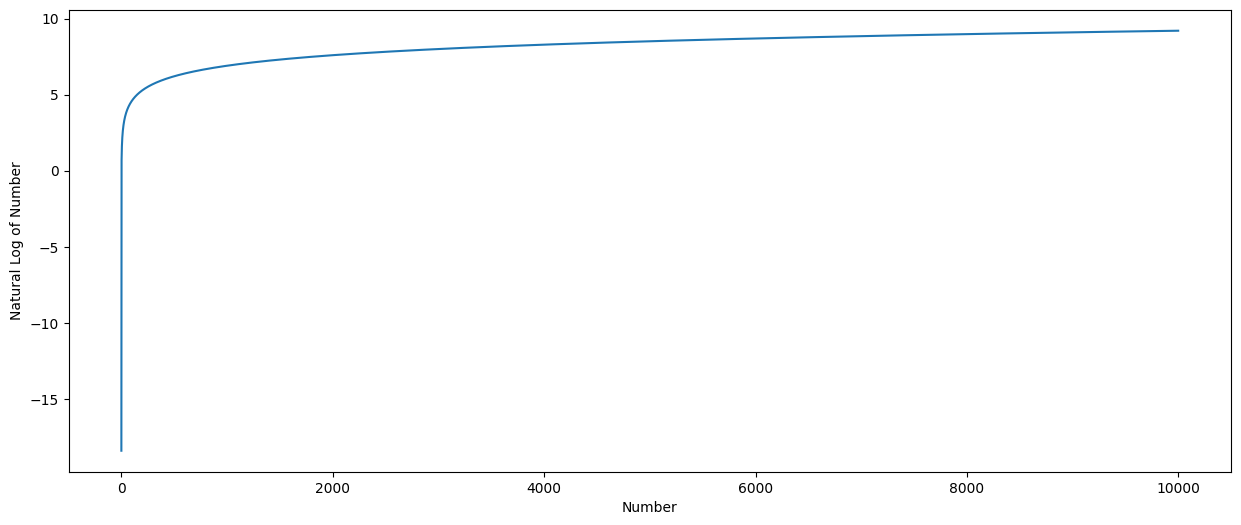

In [15]:
# graph of the log function - 0 to 10,000.
# log

plt.ylabel('Natural Log of Number')
plt.xlabel('Number')
my_range = np.arange(1e-8,10000, 1)
pd.Series(np.log(my_range), index = my_range).plot.line(figsize = (15,6));

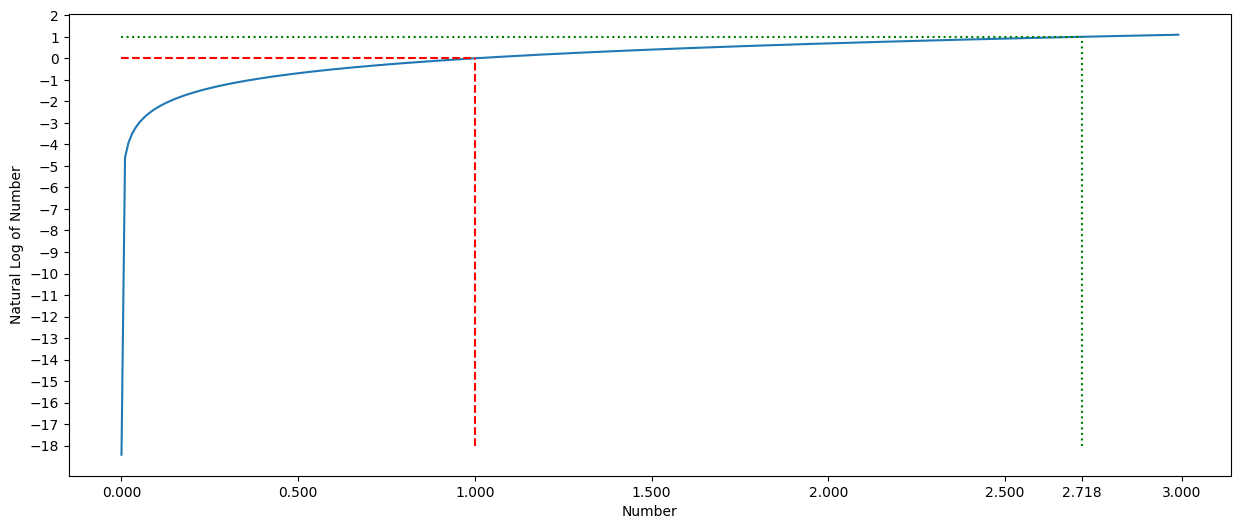

In [17]:
# graph of the log function - 0 to 3
# log

plt.ylabel('Natural Log of Number')
plt.xlabel('Number')
my_range = np.arange(1e-8, 3, .01)
pd.Series(np.log(my_range), index = my_range).plot.line(figsize = (15,6))
plt.hlines(0, 0, 1,linestyles='dashed', colors='red')
plt.vlines(1, -18, 0,linestyles='dashed', colors='red')
plt.yticks(np.arange(-18,3,1))
plt.hlines(1, 0, np.exp(1),linestyles='dotted', colors='green')
plt.vlines(np.exp(1), -18, 1,linestyles='dotted', colors='green')
plt.xticks([0,.5,1,1.5,2,2.5, 2.7182,3]);

In [18]:
print(np.exp(1))

2.718281828459045


One limitation of log transforms is that they can only be applied to positive numbers as logs are not defined for negative numbers.

Log of zero is not defined. If you could end up with log(0), you should add a very tiny number, eg 1e-8 so that you don't end up with a _nan_.


In [19]:
# Logs of negative numbers, or 0, yield an error
print('Log of 0 is', np.log(0))
print('Log of -1 is', np.log(-1))
print('Log of +1 is', np.log(1))
print('Log of +2.72 is', np.log(2.72))

Log of 0 is -inf
Log of -1 is nan
Log of +1 is 0.0
Log of +2.72 is 1.000631880307906


C:\Users\user\AppData\Local\Temp\ipykernel_14040\4097127657.py:2: RuntimeWarning: divide by zero encountered in log
  print('Log of 0 is', np.log(0))
C:\Users\user\AppData\Local\Temp\ipykernel_14040\4097127657.py:3: RuntimeWarning: invalid value encountered in log
  print('Log of -1 is', np.log(-1))


**Applying Log Transformation to Price in our Diamonds Dataset**  
Both graphs below represent the same data.  

The second graph represents a ‘feature’ we have extracted from the original data.  

In some cases, such transformed data may allow us to build models that perform better.  


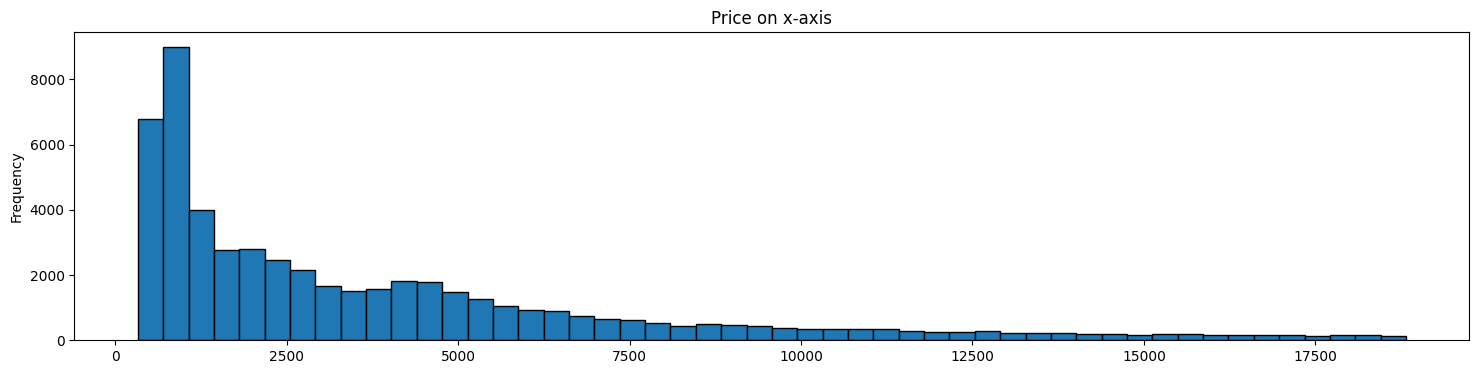

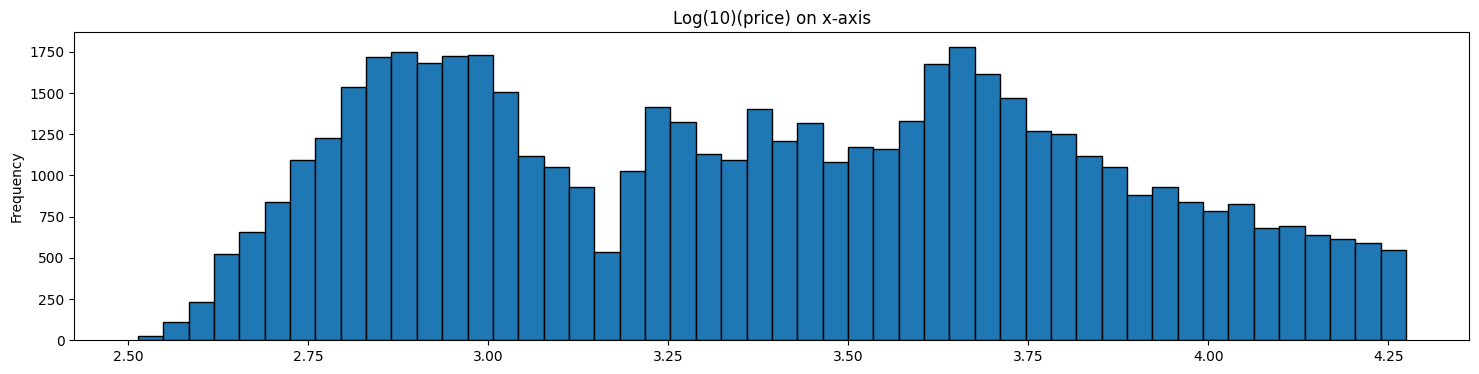

In [20]:
diamonds.price.plot(kind='hist', bins = 50, figsize = (18,4), \
                    edgecolor='black', title='Price on x-axis');
plt.show()
diamonds['log_transform'] = np.log10(diamonds.price)
diamonds['log_transform'].plot(kind='hist', bins = 50, figsize = (18,4), \
                              edgecolor='black', title='Log(10)(price) on x-axis');

## Box Cox Transform

The log transform is an example of a family of transformations known as power transforms.  In statistical terms, these are variance-stabilizing transformations.  

Another similar transform is taking the square root of the data series.  

A generalization of the square root transform and the log transform is known as the Box-Cox transform.  

The Box-Cox transform takes a parameter, $\lambda$, and its formula is as follows:  

> If $\lambda\neq0$, then: $\tilde{x}$ = $\frac{x^\lambda -1}{\lambda}$  
> If $\lambda=0$, then: $\tilde{x}$ = $ln(x)$

When $\lambda=0$ , the Box-Cox transform is nothing but the log transform.  

In Python, Box-Cox is available as a function through Scipy.  The Scipy implementation optimizes the value of $\lambda$ so that the resulting distribution is as close as possible to a normal distribution.


In [21]:
from scipy.stats import boxcox

In [22]:
bc_data, bc_lambda = boxcox(diamonds.price)
print('Lambda is:', bc_lambda)

diamonds['boxcox_transform'] = bc_data


Lambda is: -0.06699030544539092


Lambda for Box-Cox is: -0.06699030544539092


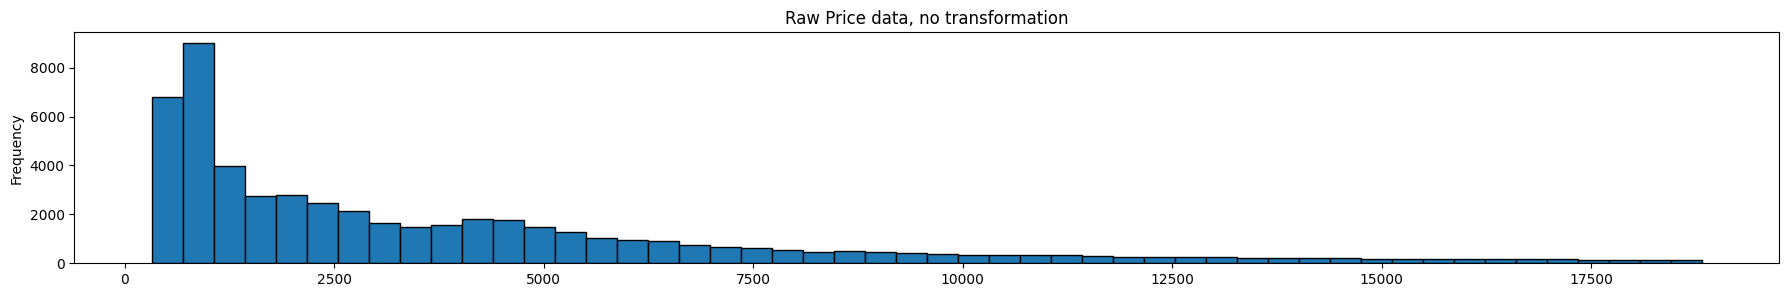

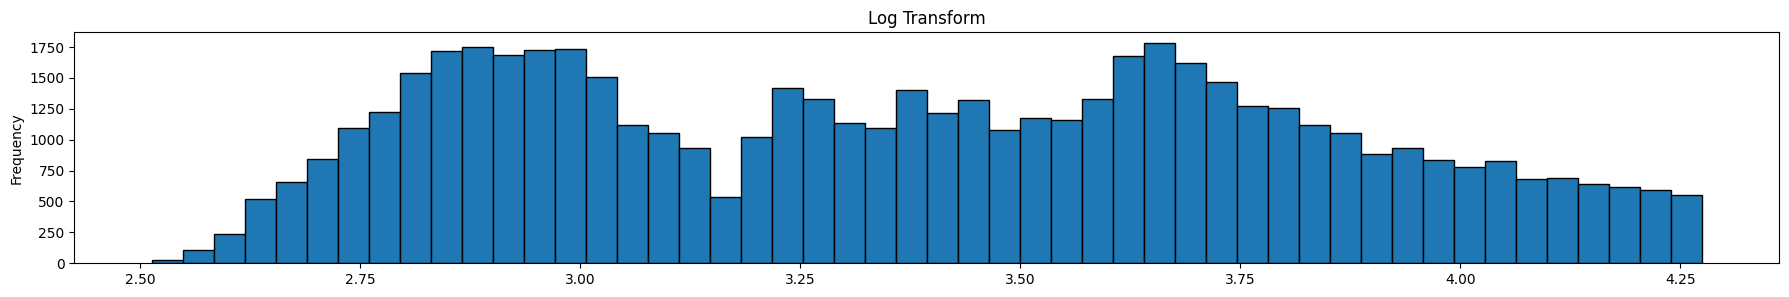

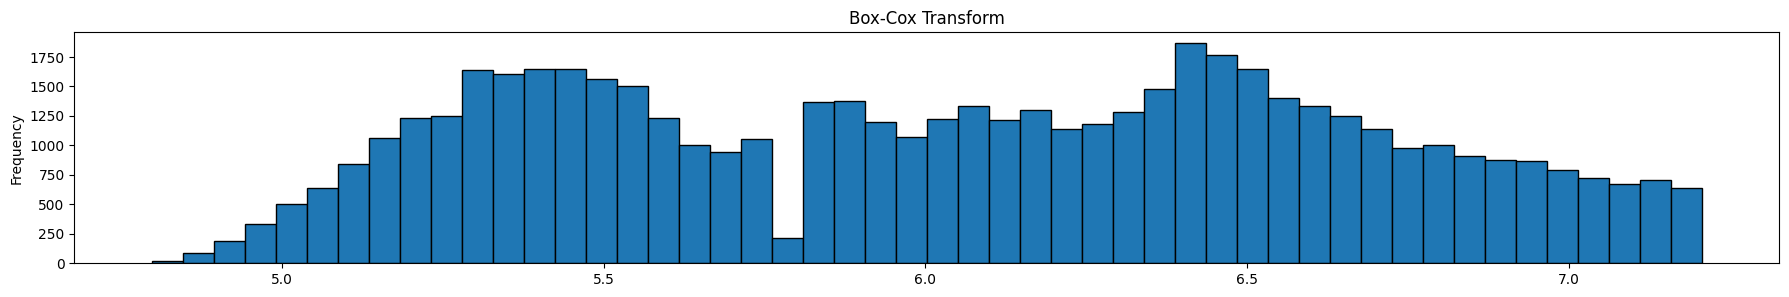

In [23]:
print('Lambda for Box-Cox is:', bc_lambda)
diamonds.price.plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Raw Price data, no transformation');
plt.show()
diamonds['log_transform'].plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Log Transform');
plt.show()
diamonds['boxcox_transform'].plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Box-Cox Transform');


Review the graphics above.  The top graph is the untranformed data, the next one is the same data after a log transform, and the final one is the same data after a box-cox transform.  Note that it is the x-axis that is being transformed, ie the prices.  

The optimal Box-Cox transform deflates the tail more than the log transform.  Since the box-cox transform tries to take the distribution as close as possible to a normal distribution, we can use Q-Q plots, or probability plots to compare observed to theoretical quantiles under the normal distribution.  For our purposes though, we do not need to do that, so we will skip this.

One limitation of box cox transforms is that they can only be applied to positive numbers.  To get over this limitation add a constant equal to the smallest negative value in your data to your entire array.  



## Feature Scaling
### Minmax & standardization

**Minmax and standardization of feature columns**  

The Box-Cox transform handled skew.  Sometimes we may need to ‘scale’ the features, which means we make them fit to a nice scale by using simple arithmetic operations.

Min-Max Scaling:  
$\widetilde{x}=\frac{x\ -\min{\left(x\right)}}{\max{\left(x\right)}-\min(x)}$  
  
  
Standardization:  
$\widetilde{x}=\frac{x\ -mean\left(x\right)}{StdDev\left(x\right)}$  

In [24]:
import sklearn.preprocessing as preproc
diamonds['minmax'] = preproc.minmax_scale(diamonds[['price']])
diamonds['standardized'] = preproc.StandardScaler().fit_transform(diamonds[['price']]) # At the column level
diamonds['l2_normalized'] = preproc.normalize(diamonds[['price']], axis=0)

As we can see below, feature scaling did not impact the shape of distribution – only the scaling of the x-axis changed.  

Feature scaling is useful when features vary significantly in scale, eg, count of hits of a webpage (large) vs number of orders of the item on that page (very small)

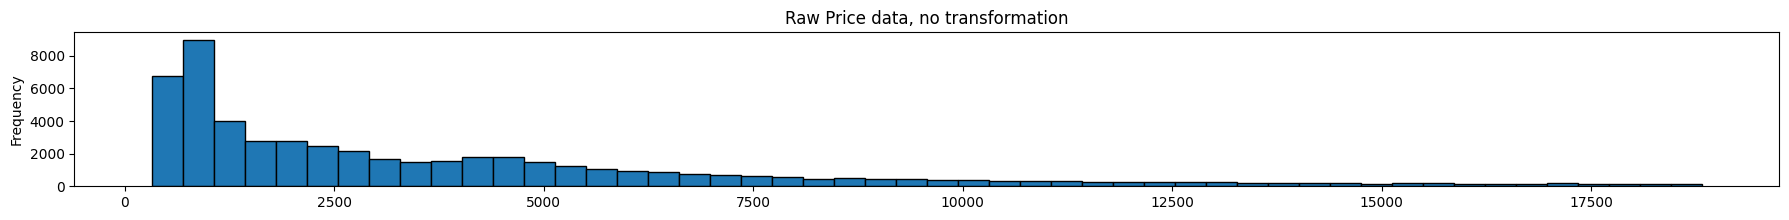

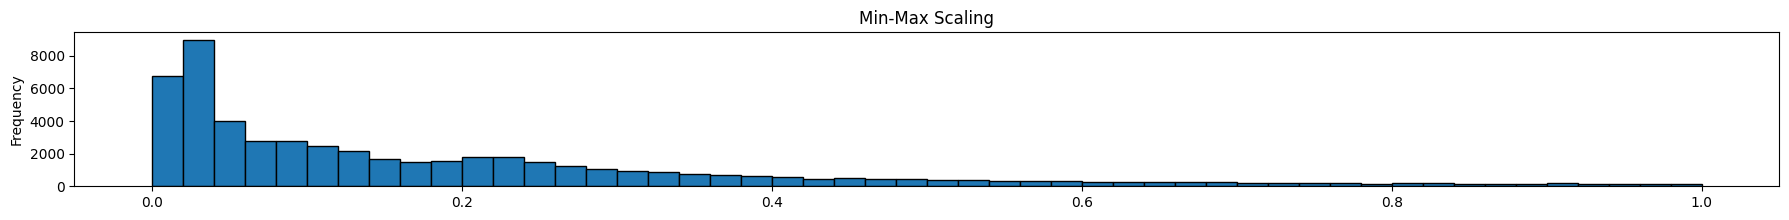

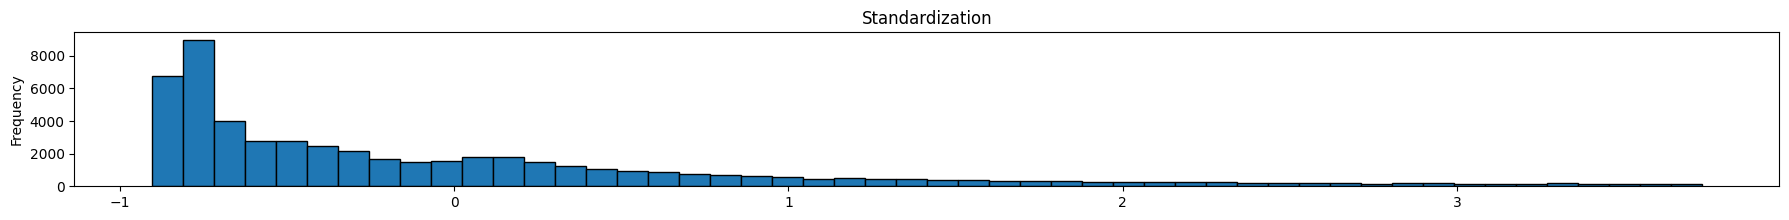

In [27]:
diamonds.price.plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Raw Price data, no transformation');
plt.show()
diamonds['minmax'].plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Min-Max Scaling');
plt.show()
diamonds['standardized'].plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Standardization');
plt.show()
# diamonds['l2_normalized'].plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='L2 Normalized');
# plt.show()


**Using `scipy.stats.zscore` for a single data series**  
Standardization of a single data series, or vector can be done using the function `zscore`.  
This may be necessary as `StandardScaler` expects an m x n array as input (to standardize an entire feature set, as opposed to a single column)

In [28]:
from scipy.stats import zscore
zscore(diamonds.price)

0       -0.904095
1       -0.904095
2       -0.903844
3       -0.902090
4       -0.901839
           ...   
53935   -0.294731
53936   -0.294731
53937   -0.294731
53938   -0.294731
53939   -0.294731
Name: price, Length: 53940, dtype: float64

### Fit, Transform & Fit_Transform

As an example, we look at an array and 'fit' a min-max scaler to it.  

Numpy requires the data to be in a specific shape - the array must have columns, and every column is scaled separately.  We will have only column in this example, with four values.

In [32]:
# Set up the data
data = np.array([2,4,8,12])
data = data.reshape(-1, 1)
data

array([[ 2],
       [ 4],
       [ 8],
       [12]])

In [34]:
# Fit the scaler using a variable called 'myscaler'
myscaler = preproc.MinMaxScaler()
myscaler.fit(data)

MinMaxScaler()

In [35]:
# We check the max
myscaler.data_max_

array([12.])

In [36]:
# Check the min
myscaler.data_min_

array([2.])

In [37]:
# Transform the data
myscaler.transform(data)

array([[0. ],
       [0.2],
       [0.6],
       [1. ]])

In [38]:
# Or we can do fit and transform as a single step
myscaler.fit_transform(data)

array([[0. ],
       [0.2],
       [0.6],
       [1. ]])

In [39]:
# Now we transform new data
newdata = np.array([2,4,8,12,15])
newdata = newdata.reshape(-1, 1)
newdata

array([[ 2],
       [ 4],
       [ 8],
       [12],
       [15]])

In [40]:
myscaler.transform(newdata)

array([[0. ],
       [0.2],
       [0.6],
       [1. ],
       [1.3]])

In [42]:
myscaler.inverse_transform([[1.3]])

array([[15.]])

### L2 Normalization  
Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
L2 Normalization:  

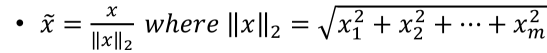

$||x||_2$ is a constant, equal to the Euclidean length of the vector.
$x$ is the feature vector itself. 

This is useful when observations vary a lot between themselves.

_Source: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization_

**Use normalization where observations vary a lot between themselves.**  

Let us look at an example.

In [43]:
# let us create the dataframe first
# Data source: https://data.worldbank.org/?locations=AU-CN-CH-IN-VN

df = pd.DataFrame({'NI-USDTrillion': {'Australia': 1034.18,
  'China': 10198.9,
  'India': 2322.05,
  'Switzerland': 519.097,
  'Vietnam': 176.367},
 'AgriLand-sqkm-mm': {'Australia': 3.71837,
  'China': 5.285311,
  'India': 1.79674,
  'Switzerland': 0.01512999,
  'Vietnam': 0.121688},
 'Freight-mm-ton-km': {'Australia': 1982.586171,
  'China': 23323.6147,
  'India': 2407.098107,
  'Switzerland': 1581.35236,
  'Vietnam': 453.34954},
 'AirPassengers(m)': {'Australia': 74.257326,
  'China': 551.234509,
  'India': 139.752424,
  'Switzerland': 26.73257,
  'Vietnam': 42.592762},
 'ArableLandPct': {'Australia': 3.997909522,
  'China': 12.67850328,
  'India': 52.6088141,
  'Switzerland': 10.07651831,
  'Vietnam': 22.53781404},
 'ArableLandHect': {'Australia': 30.752,
  'China': 119.4911,
  'India': 156.416,
  'Switzerland': 0.398184,
  'Vietnam': 6.9883},
 'ArmedForces': {'Australia': 58000.0,
  'China': 2695000.0,
  'India': 3031000.0,
  'Switzerland': 21000.0,
  'Vietnam': 522000.0}})

In [46]:
df

,NI-USDTrillion,AgriLand-sqkm-mm,Freight-mm-ton-km,AirPassengers(m),ArableLandPct,ArableLandHect,ArmedForces
Australia,1034.180,3.718370,1982.586171,74.257326,3.997910,30.752000,58000.0
China,10198.900,5.285311,23323.614700,551.234509,12.678503,119.491100,2695000.0
India,2322.050,1.796740,2407.098107,139.752424,52.608814,156.416000,3031000.0
Switzerland,519.097,0.015130,1581.352360,26.732570,10.076518,0.398184,21000.0
Vietnam,176.367,0.121688,453.349540,42.592762,22.537814,6.988300,522000.0


Consider the dataset above.  Some countries have very large numbers compared to the others.  Such observations can upset distance and other calculations in our models. 

How can we find countries whose profiles are 'similar' to each other?


In [47]:
import sklearn.preprocessing as preproc
df2 = pd.DataFrame(preproc.normalize(df), columns = df.columns, index= df.index) # At the row level
df2

,NI-USDTrillion,AgriLand-sqkm-mm,Freight-mm-ton-km,AirPassengers(m),ArableLandPct,ArableLandHect,ArmedForces
Australia,0.017817,6.406217e-05,0.034157,0.001279,0.000069,0.000530,0.999257
China,0.003784,1.961067e-06,0.008654,0.000205,0.000005,0.000044,0.999955
India,0.000766,5.927875e-07,0.000794,0.000046,0.000017,0.000052,0.999999
Switzerland,0.024642,7.182228e-07,0.075067,0.001269,0.000478,0.000019,0.996873
Vietnam,0.000338,2.331187e-07,0.000868,0.000082,0.000043,0.000013,1.000000


In [48]:
(df2**2).sum(axis=1)

Australia      1.0
China          1.0
India          1.0
Switzerland    1.0
Vietnam        1.0
dtype: float64

In [58]:
# Distances after L2-normalization
from sklearn.metrics.pairwise import euclidean_distances
pd.DataFrame(euclidean_distances(df2, df2), columns = df2.index, index = df2.index)

,Australia,China,India,Switzerland,Vietnam
Australia,0.000000,0.029141,0.037499,0.041549,0.037629
China,0.029141,0.000000,0.008421,0.069689,0.008515
India,0.037499,0.008421,0.000000,0.078090,0.000439
Switzerland,0.041549,0.069689,0.078090,0.000000,0.078150
Vietnam,0.037629,0.008515,0.000439,0.078150,0.000000


In [61]:
# Distances before L2-normalization
from sklearn.metrics.pairwise import euclidean_distances
pd.DataFrame(euclidean_distances(df, df), columns = df2.index, index = df2.index).round(0)

,Australia,China,India,Switzerland,Vietnam
Australia,0.0,2637102.0,2973000.0,37006.0,464003.0
China,2637102.0,0.0,336743.0,2674106.0,2173144.0
India,2973000.0,336743.0,0.0,3010001.0,2509002.0
Switzerland,37006.0,2674106.0,3010001.0,0.0,501001.0
Vietnam,464003.0,2173144.0,2509002.0,501001.0,0.0


### Inversing a transform

The opposite of fit_transform is `inverse_transform`.  

Example:  We standardize prices, and reverse the process to get back the original prices.  

Normally you will not need to do this as long as the target variable has not been transformed.  


In [62]:
diamonds = sns.load_dataset('diamonds')
print('Original diamond prices (first 4 only)')
print(diamonds['price'][:4])
scaler = preproc.StandardScaler()
diamonds['standardized'] = scaler.fit_transform(diamonds[['price']])
print('\n\nStandardized prices')
print(diamonds['standardized'][:4])
print('\n\nReconstructed prices by un-scaling the standardized prices:')
print(scaler.inverse_transform(diamonds['standardized'][:4].values.reshape(-1, 1)))

Original diamond prices (first 4 only)
0    326
1    326
2    327
3    334
Name: price, dtype: int64


Standardized prices
0   -0.904095
1   -0.904095
2   -0.903844
3   -0.902090
Name: standardized, dtype: float64


Reconstructed prices by un-scaling the standardized prices:
[[326.]
 [326.]
 [327.]
 [334.]]


## Categorical to Numeric

A lot of data we will encounter as inputs to our modeling process will be categorical, for example, country names, species, gender, county etc.  While we humans can make sense of this, algorithms can only consume numerical data.  We will next look at a few ways of converting categorical data to numerical information.  Conceptually, all of these methods rely on one of two ideas:

1. One-hot: Create a separate column for every single category, and populate it with either a 0 or a 1, or
2. Label encoding: Call the category values as numbers, eg, High=3, Medium=2, Low=1 etc.  

### One hot encoding  

- Categorical variables represent categories, or labels.
  - Cardinal/Nonordinal categories: For example, names of species, countries, industry, gender etc.  No natural order, and < or > relationships do not apply
  - Ordinal categories: For example, High, Medium, Low (where High > Medium > Low), or XL, L, M, S
- Most ML/AI algorithms cannot deal with categorical variables on their own, and require categories to be converted to numerical arrays.
- One-hot encoding is often used to convert categories to numbers.
  - Variations include dropping the first category, and effect encoding.


One hot encoding creates a column with a 1 or 0 for each category label.  


In [63]:
df = pd.DataFrame({'fruit': 
                   ['apple', 'banana', 'pear', 
                    'pear', 'apple', 'apple'],
                  'weight_gm':[120,100,104,60,98,119],
                  'price':[0.25, 0.18, 0.87, 0.09, 1.02,.63]})
df

,fruit,weight_gm,price
0,apple,120,0.25
1,banana,100,0.18
2,pear,104,0.87
3,pear,60,0.09
4,apple,98,1.02
5,apple,119,0.63


In [64]:
pd.get_dummies(df)

,weight_gm,price,fruit_apple,fruit_banana,fruit_pear
0,120,0.25,True,False,False
1,100,0.18,False,True,False
2,104,0.87,False,False,True
3,60,0.09,False,False,True
4,98,1.02,True,False,False
5,119,0.63,True,False,False


You only really need $k-1$ columns to encode $k$ categories.
The all-zeros vector represents the first category, called in this case the ‘reference category’.

One hot encoding can be challenging to use if there are more than a handful of categories.  We can do this in pandas using the parameter `drop_first=True`.


In [65]:
pd.get_dummies(df, drop_first=True)

,weight_gm,price,fruit_banana,fruit_pear
0,120,0.25,False,False
1,100,0.18,True,False
2,104,0.87,False,True
3,60,0.09,False,True
4,98,1.02,False,False
5,119,0.63,False,False


### Label encoding

What we saw with get_dummies would work for input variables (as most models will accommodate more columns), but how do we deal with target variables that are categorical?  

This can become an issue as most ML algorithms expect a single column target variable.  

In such situations, we can assign numbers to different categories, eg,  
0 = apple,  
1 = banana,  
2 = pear etc.!  

Original data is transformed into labels that are classes named as 0, 1

In [66]:
df

,fruit,weight_gm,price
0,apple,120,0.25
1,banana,100,0.18
2,pear,104,0.87
3,pear,60,0.09
4,apple,98,1.02
5,apple,119,0.63


For multiclass classification problems for neural nets, a slightly different label encoding scheme is desired.  

We use tensorflow’s `to_categorical` function on the encoded labels (not on the raw labels!). The function converts a class vector (integers) to binary class matrix.  

This is similar to `get_dummies()` from pandas.  



In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(df['fruit'].values.ravel()) # This needs a 1D array
df['encoded_labels'] = encoded_labels
df

,fruit,weight_gm,price,encoded_labels
0,apple,120,0.25,0
1,banana,100,0.18,1
2,pear,104,0.87,2
3,pear,60,0.09,2
4,apple,98,1.02,0
5,apple,119,0.63,0


In [68]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'apple', 1: 'banana', 2: 'pear'}

In [69]:
from tensorflow.keras.utils import to_categorical
to_categorical(encoded_labels)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

***
Next, we look at some of the commonly used functions used for converting categories to numbers.  

**OneHotEncoder**  
Used for X variables.  Can convert multiple columns to one hot format directly from categorical text. Directly takes an array as an input. 

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

In [71]:
values = df[['fruit']]
values

,fruit
0,apple
1,banana
2,pear
3,pear
4,apple
5,apple


In [72]:
oh = OneHotEncoder(sparse_output=False)
myonehot = oh.fit_transform(values)
myonehot


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

***
**LabelEncoder**  
Used for Y variables - this doesn't give you one-hot encoding, but gives you integer encoding.

In [74]:
le = LabelEncoder()
int = le.fit_transform(values.fruit) # This needs a 1D arrary
print("Now int has integers, type is ", type(int))
print('int shape: ', int.shape)
int

Now int has integers, type is  <class 'numpy.ndarray'>
int shape:  (6,)


array([0, 1, 2, 2, 0, 0])

***  
**LabelBinarizer**  
Used for Y variables - produces one-hot encoding for Y variables.  Each observation belongs to one and only one class.

In [75]:
lb = LabelBinarizer()
myonehot = lb.fit_transform(values) 
my1hot_df = pd.DataFrame(lb.fit_transform(values), columns=lb.classes_)
print(my1hot_df)
print('\n \n')
print(myonehot)

   apple  banana  pear
0      1       0     0
1      0       1     0
2      0       0     1
3      0       0     1
4      1       0     0
5      1       0     0

 

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


***
**MultiLabelBinarizer**: This is used when an observation can belong to multiple labels

In [76]:
df = pd.DataFrame({"genre": [["action", "drama","fantasy"], \
                             ["fantasy","action"], ["drama"], 
                             ["sci-fi", "drama"]]})

In [77]:
df

,genre
0,"[action, drama, fantasy]"
1,"[fantasy, action]"
2,[drama]
3,"[sci-fi, drama]"


In [78]:
mlb = MultiLabelBinarizer()
myonehot = mlb.fit_transform(df['genre'])
my1hot_df = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_)
print('mlb.classes \n',mlb.classes_, '\n\n')
print('my1hot_df \n', my1hot_df, '\n\n')
print('myonehot \n', myonehot, '\n\n')

mlb.classes 
 ['action' 'drama' 'fantasy' 'sci-fi'] 


my1hot_df 
    action  drama  fantasy  sci-fi
0       1      1        1       0
1       1      0        1       0
2       0      1        0       0
3       0      1        0       1 


myonehot 
 [[1 1 1 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 1 0 1]] 




## Imbalanced classes

Imbalanced data is data for classification problems where the observations are not equally distributed (or roughly so) across the different classes.  An imbalanced data set is one with skewed class proportions.  

As a result, many algorithms underperform as they do not get to learn the underrepresented class, which is often the one of interest.  

Example: a dataset for disease prediction has <1% of the observations which are positive for the disease.  

There is no precise definition of when a dataset should be considered imbalanced, but as a rule of thumb it is something to be concerned about if less than 20% of the observations belong to one class in a binary classification problem.  

Approaches to addressing the problem of imbalanced data focus on doing something that improves the ratio of the underrepresented category in the dataset.  

This can be done in two ways:  
 - Reduce observations in the majority class  
 - Increase observations for the minority class  

Let us see next how this can be done.  

**Old Faithful Dataset**  

We look at the dataset from the Old Faithful geyser's eruptions at the Yellowstone National Park.  

Data Description: 
     - Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

     - A data frame with 272 observations on 2 variables.

Columns:  
- duration - numeric - Eruption time in mins  
- waiting - numeric - Waiting time to next eruption  
- kind - categorical - Kind of eruption (long/short)  



In [79]:
df = sns.load_dataset('geyser')

In [80]:
df

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [81]:
print(df.kind.value_counts())
print('\n---\n')
print(df.kind.value_counts(normalize=True))

kind
long     172
short    100
Name: count, dtype: int64

---

kind
long     0.632353
short    0.367647
Name: proportion, dtype: float64


In [82]:
# Split the dataframe between X and y
X = df[['duration', 'waiting']]
y = df[['kind']]

In [83]:
y.value_counts()

kind 
long     172
short    100
Name: count, dtype: int64

### Approach 1: Reduce Observations for Majority Class

Several approaches available, for example:
- Random Under Sampling: Randomly remove majority class observations to match the number of observations in the minority class.  
- Cluster Centroids Method: Remove majority class observations and replace them with synthetic data representing the centroids of k-means clusters.

Observations are removed till all classes have a count of observation equal to the class with the lowest count of observations.

Generally, 1 above (random undersampling) should suffice for most general cases.  Other approaches available as well, listed at https://imbalanced-learn.org/


#### Random Under Sampler

Several approaches available, for example:

 - Random Under Sampling: Randomly remove majority class observations to match the number of observations in the minority class.  
 - Cluster Centroids Method: Remove majority class observations and replace them with synthetic data representing the centroids of k-means clusters.

Observations are removed till all classes have a count of observation equal to the class with the lowest count of observations.

Generally, 1 above (random undersampling) should suffice for most general cases. 

Other approaches available as well, listed at https://imbalanced-learn.org/


In [84]:
from imblearn.under_sampling import RandomUnderSampler

In [85]:
undersampler = RandomUnderSampler()
X_res, y_res = undersampler.fit_resample(X, y)

In [86]:
y_res.value_counts()

kind 
long     100
short    100
Name: count, dtype: int64

In [87]:
X

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [88]:
y

,kind
0,long
1,short
2,long
3,short
4,long
...,...
267,long
268,short
269,long
270,short


### Centroid Based Under Sampler

In [89]:
from imblearn.under_sampling import ClusterCentroids
clustercentroids = ClusterCentroids()
X_res, y_res = clustercentroids.fit_resample(X, y)

In [90]:
y_res.value_counts()

kind 
long     100
short    100
Name: count, dtype: int64

Notice how the majority class has been undersampled to match the count of 100 short eruptions (the minority class).

### Approach 2: Add Observations to the Minority Classes
Several approaches available, for example:  
- Random Over Sampling: Randomly duplicate observations in the minority class till the count of the modal class is reached  
- SMOTE: Synthetic Minority Oversampling Technique  

You may have to try both approaches to see which one gives you better results.

All classes that have observations fewer than the class with the maximum count will have their counts increased to match that of the class with the highest count.


#### Random Over Sampler


In [91]:
from imblearn.over_sampling import RandomOverSampler
randomoversampler = RandomOverSampler()
X_res, y_res = randomoversampler.fit_resample(X, y)

In [92]:
y_res.value_counts()

kind 
long     172
short    172
Name: count, dtype: int64

#### SMOTE Over Sampler  

SMOTE = Synthetic Minority Oversampling Technique

SMOTE works as follows:  
1. Take a random sample from the minority class  
2. Find k nearest neighbors for this sample observation  
3. Randomly select one of the neighbors  
4. Draw a line between this random neighbor and the sample observation  
5. Identify a point on the line between the two to get another minority data point.  


Fortunately, this complicated series of motions is implemented for us in Python by the library imbalanced-learn  

Often, under-sampling and SMOTE are combined to build a larger data set with greater representation for the minority class.

In [93]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [94]:
y_res.value_counts()

kind 
long     172
short    172
Name: count, dtype: int64

Notice how the count of observations in the minority class have gone up to match the count of the majority class.


## Principal Component Analysis  

**Overview**  
The problem we are trying to solve with PCA is that when we are trying to look for relationships in data, there may sometimes be too many variables in the feature set that are all somewhat related to each other.  

Consider the mtcars dataset.  Though the columns represent different things, we can imagine that horsepower, number of cylinders, engine size (displacement) etc are all related to each other.  

What PCA allows us to do is to replace a large number of variables with much fewer ‘artificial’ variables that effectively represent the same data. These artificial variables are called principal components.  

So you might have a hundred variables in the original data set, and you may be able to replace them with just two or three mathematically constructed ‘artificial variables’ that explain the data just about as well as the original data set.  

These ‘artificial variables’ are built mathematically as linear combinations of the underlying original variables. These new ‘artificial variables’, called principal components, may or may not be capable of any intuitive human interpretation.  

The number of principal components that can be identified for any dataset is equal to the number of the variables in the dataset. But if one had to use all the principal components, it would not be very helpful because the complexity of the data is not reduced at all, and we are replacing natural variables with artificial ones that may not have a logical interpretation.  

We can decide which principal components to use and which to discard. But how do we do that?  

Each principal component accounts for a part of the total variation that the original dataset had. We pick the top 2 or 3 (or n) principal components so we have a satisfactory proportion of the variation in the original dataset.  

What does ‘variation’ mean, you might ask.  

Think of the data set as a scatterplot. If we had two variables, think about how they would look when plotted on a scatter plot. If we had three variables, try to visualize a three dimensional plane and how the data points would look – like a cloud kind of clustering together a little bit (or not) depending upon how correlated the system is.   

The ‘spread’ of this cloud is really the ‘variation’ contained in the data set. This can be measured in the form of variance, with each of the n columns having a variance.   

Once the principal components for the feature data have been calculated, we can also calculate the variance for each of the principal components.  

Fortunately, the simple summation of the variance of the individual original variables is equal to the summation of the variances of the principal components.  But it is distributed differently.   

We arrange the principal components in descending order of the variance each of them explains, take the top few principal components, add up their variance, and compare it to the total variance to determine how much of the variance is accounted for. If we have enough to meet our needs, we stop there.  

For example, if the top 3 or 4 principal components explain 90% of the variance (not unusual), we might just take those as our new features to replace our old cumbersome 100-column feature set, greatly simplifying our modeling problem.  


**PCA in Practice - Steps**  
1. PCA begins with standardizing the feature set.
2. Then we calculate the covariance matrix (which after standardization is the same as the correlation matrix).
3. For this covariance matrix, we now calculate the eigenvectors and eigenvalues. 
4. Every eigenvector would have as many elements as the number of features in the original dataset. These elements represent the ‘weights’ for the linear combination of the different features.
5. The eigenvalues for each of the eigenvectors represent the amount of variance that the given eigenvector accounts for. We arrange the eigenvectors in decreasing order of the eigenvalues, and pick the top 2, 3 (or as many eigenvalues) that we are interested in depending upon how much variance we want to capture in our model. 
6. If we include all the eigenvectors, then we would have captured all the variance but this would not give us any advantage over our initial data.
7. In a simplistic way, that is about all that there is to PCA. Fortunately for us, all of this is already implemented in statistical libraries, and as practitioners we need to know only the intuition before we apply it.


In [95]:
# Load the mtcars data
import statsmodels.api as sm
df = sm.datasets.get_rdataset('mtcars').data
print('Dataframe shape: ',df.shape)
df.head()

Dataframe shape:  (32, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We run principal component analysis on the mtcars dataset.  We target capturing 80% of the variation in the dataset.  We see that just two principal components capture 84% of the variation observed in the original 10 feature dataset.


In [96]:
# Separate out the features (assuming mpg is the target variable)
feat = df.iloc[:,1:]

# Next, standard scale the feature set
import sklearn.preprocessing as preproc
feat = pd.DataFrame(data=preproc.StandardScaler().fit_transform(feat), columns=feat.columns, index = feat.index)
print(feat.shape)
feat.head()

(32, 10)


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,
Mazda RX4,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
Mazda RX4 Wag,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
Datsun 710,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
Hornet 4 Drive,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
Hornet Sportabout,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


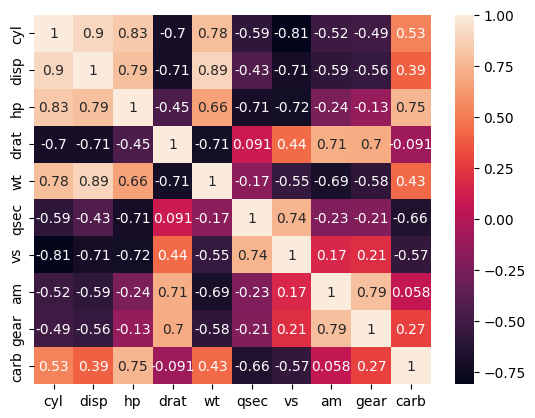

In [97]:
# Check out the correlation
sns.heatmap(feat.corr(numeric_only=True), annot=True);

Consider the mtcars dataset above.  Though the columns represent different things, we can imagine that horsepower, number of cylinders, engine size (displacement) etc are all related to each other. 

We run principal component analysis on the mtcars dataset.  We target capturing 80% of the variation in the dataset.  We see below that just two principal components capture 84% of the variation observed in the original 10 feature dataset.


### Principal Components

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.8) #0.8 means keep 80% of the variance

In [102]:
# Get the new features and hold them in variable new
pc_mtcars = pca.fit_transform(feat)

In [103]:
pc_mtcars.shape

(32, 2)

In [104]:
pc_mtcars = pd.DataFrame(pc_mtcars)
pc_mtcars

,0,1
0,0.632134,1.739877
1,0.605027,1.554343
2,2.801549,-0.122632
3,0.259204,-2.364265
4,-2.032508,-0.774822
5,0.204867,-2.778790
6,-2.846324,0.318210
7,1.938647,-1.454239
8,2.300271,-1.963602
9,0.636986,-0.150858


In [120]:
# proportion variance explained by each of the principal components
# These are also the eigenvectors
pca.explained_variance_ratio_

array([0.57602174, 0.26496432])

In [106]:
# proportion variance explained by including each PC
(pca.explained_variance_ratio_).cumsum()

array([0.57602174, 0.84098606])

In [107]:
# proportion variance explained by both
(pca.explained_variance_ratio_).cumsum()[-1]

0.8409860622774872

In [108]:
# Absolute variance explained
pca.explained_variance_

array([5.9460309 , 2.73511555])

In [109]:
# Check if the principal components are orthogonal (dot product should be zero)
np.dot(pc_mtcars[0], pc_mtcars[1])

1.2434497875801753e-14

In [110]:
pc_mtcars.head()

,0,1
0,0.632134,1.739877
1,0.605027,1.554343
2,2.801549,-0.122632
3,0.259204,-2.364265
4,-2.032508,-0.774822


In [111]:
pc_mtcars.index = df.index
pc_mtcars.columns = ['PC-0', 'PC-1']
pc_mtcars

,PC-0,PC-1
rownames,,
Mazda RX4,0.632134,1.739877
Mazda RX4 Wag,0.605027,1.554343
Datsun 710,2.801549,-0.122632
Hornet 4 Drive,0.259204,-2.364265
Hornet Sportabout,-2.032508,-0.774822
Valiant,0.204867,-2.778790
Duster 360,-2.846324,0.318210
Merc 240D,1.938647,-1.454239
Merc 230,2.300271,-1.963602


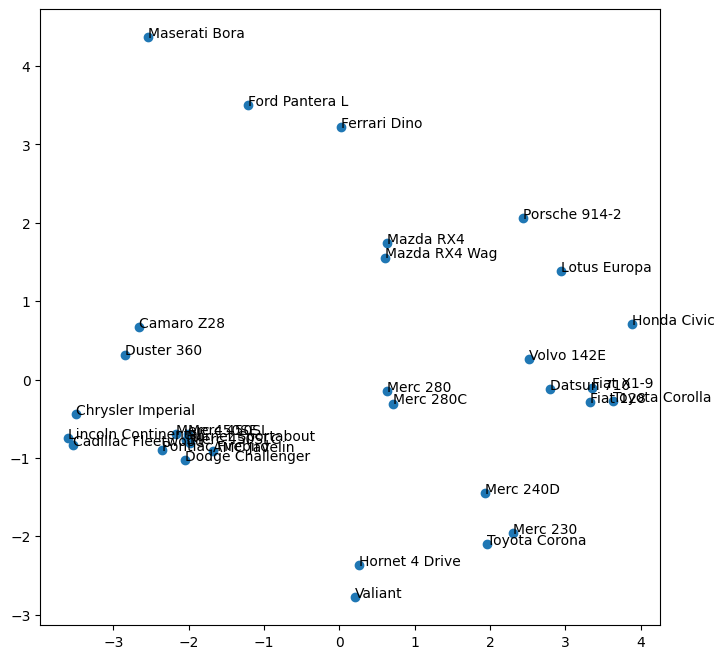

In [112]:
plt.figure(figsize = (8,8))
x, y = pc_mtcars['PC-0'].values, pc_mtcars['PC-1'].values
ax = plt.scatter(x,y)
for i, txt in enumerate(pc_mtcars.index):
    plt.annotate(txt, (x[i], y[i]), fontsize=10)

### Eigenvectors
Check if eigenvectors multiplied by original feature set data equals the principal components (Optional)

In [113]:
# Eigenvectors.  These are multiplied by the actual features and summed up to get the new features
ev = pca.components_
ev

array([[-0.40297112, -0.39592428, -0.35432552,  0.3155948 , -0.36680043,
         0.21989818,  0.33335709,  0.24749911,  0.22143747, -0.22670801],
       [ 0.03901479, -0.05393117,  0.24496137,  0.27847781, -0.14675805,
        -0.46066271, -0.22751987,  0.43201042,  0.46516217,  0.411693  ]])

In [114]:
# For the first observation, these are the new feature values
pc_mtcars.iloc[0:2]


,PC-0,PC-1
rownames,,
Mazda RX4,0.632134,1.739877
Mazda RX4 Wag,0.605027,1.554343


In [115]:
# Original standardized features for the first observation
feat.iloc[0]

cyl    -0.106668
disp   -0.579750
hp     -0.543655
drat    0.576594
wt     -0.620167
qsec   -0.789601
vs     -0.881917
am      1.208941
gear    0.430331
carb    0.746967
Name: Mazda RX4, dtype: float64

In [116]:
# Multiplying the first observation with the eignevectors
(ev[0] * feat.iloc[0])

cyl     0.042984
disp    0.229537
hp      0.192631
drat    0.181970
wt      0.227477
qsec   -0.173632
vs     -0.293993
am      0.299212
gear    0.095292
carb   -0.169343
Name: Mazda RX4, dtype: float64

In [117]:
# Next we sum up the above to get the first PC for the first observation
(ev[0] * feat.iloc[0]).sum()

0.6321344928989644

In [118]:
# We can get the first PC for all the observations together as well
(ev[0] * feat).sum(axis=1)

rownames
Mazda RX4              0.632134
Mazda RX4 Wag          0.605027
Datsun 710             2.801549
Hornet 4 Drive         0.259204
Hornet Sportabout     -2.032508
Valiant                0.204867
Duster 360            -2.846324
Merc 240D              1.938647
Merc 230               2.300271
Merc 280               0.636986
Merc 280C              0.712003
Merc 450SE            -2.168500
Merc 450SL            -2.013998
Merc 450SLC           -1.983030
Cadillac Fleetwood    -3.540037
Lincoln Continental   -3.597893
Chrysler Imperial     -3.493731
Fiat 128               3.329571
Honda Civic            3.883988
Toyota Corolla         3.636227
Toyota Corona          1.962264
Dodge Challenger      -2.048033
AMC Javelin           -1.682576
Camaro Z28            -2.658623
Pontiac Firebird      -2.354816
Fiat X1-9              3.358263
Porsche 914-2          2.440051
Lotus Europa           2.946328
Ford Pantera L        -1.212566
Ferrari Dino           0.014182
Maserati Bora         -2.541137

In [119]:
# Next we get the second principal component
(ev[1] * feat).sum(axis=1)

rownames
Mazda RX4              1.739877
Mazda RX4 Wag          1.554343
Datsun 710            -0.122632
Hornet 4 Drive        -2.364265
Hornet Sportabout     -0.774822
Valiant               -2.778790
Duster 360             0.318210
Merc 240D             -1.454239
Merc 230              -1.963602
Merc 280              -0.150858
Merc 280C             -0.308009
Merc 450SE            -0.698349
Merc 450SL            -0.698920
Merc 450SLC           -0.811307
Cadillac Fleetwood    -0.841191
Lincoln Continental   -0.747153
Chrysler Imperial     -0.445347
Fiat 128              -0.292943
Honda Civic            0.704290
Toyota Corolla        -0.276133
Toyota Corona         -2.101797
Dodge Challenger      -1.026281
AMC Javelin           -0.913388
Camaro Z28             0.669277
Pontiac Firebird      -0.899123
Fiat X1-9             -0.103399
Porsche 914-2          2.057439
Lotus Europa           1.383718
Ford Pantera L         3.498277
Ferrari Dino           3.221361
Maserati Bora          4.366990

These manually obtained PCs are identical to the ones we got earlier using `pca.fit_transform(feat)`

***
**END**


In [231]:
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap

In [232]:
feat

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,
Mazda RX4,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
Mazda RX4 Wag,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
Datsun 710,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
Hornet 4 Drive,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
Hornet Sportabout,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083
Valiant,-0.106668,-0.046906,-0.617748,-1.589643,0.252064,1.348220,1.133893,-0.827170,-0.946729,-1.140108
Duster 360,1.031121,1.059772,1.456847,-0.734549,0.366285,-1.142114,-0.881917,-0.827170,-0.946729,0.746967
Merc 240D,-1.244457,-0.688779,-1.254944,0.177551,-0.028296,1.223135,1.133893,-0.827170,0.430331,-0.511083
Merc 230,-1.244457,-0.737144,-0.765933,0.614599,-0.069830,2.871986,1.133893,-0.827170,0.430331,-0.511083


### t-SNE

t–Stochastic Neighbourhood Embedding


In [233]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=4, n_iter=4000).fit_transform(feat)

In [234]:
tsne

array([[ -67.28988  ,   -7.461225 ],
       [ -70.462395 ,   -1.230129 ],
       [-109.79255  ,  -26.001574 ],
       [ -14.49516  ,  -98.97109  ],
       [  88.77131  ,  -10.752994 ],
       [  -7.538271 ,  -98.85341  ],
       [  96.28523  ,   32.15872  ],
       [ -39.203053 ,  -97.86199  ],
       [ -45.55487  , -103.012344 ],
       [ -45.803345 ,  -73.82526  ],
       [ -48.023323 ,  -80.474434 ],
       [  76.36449  ,   14.991346 ],
       [  82.82964  ,    8.64965  ],
       [  74.56219  ,    5.692307 ],
       [  61.549232 ,   66.105705 ],
       [  59.30757  ,   58.038372 ],
       [  67.97727  ,   59.218933 ],
       [-121.32329  ,  -28.11285  ],
       [-123.71266  ,  -47.980957 ],
       [-125.013916 ,  -36.53466  ],
       [ -31.122364 , -100.07239  ],
       [ 101.20207  ,  -10.095666 ],
       [  93.759026 ,   -3.7495155],
       [  94.439705 ,   38.97752  ],
       [  87.12706  ,  -18.712942 ],
       [-114.96241  ,  -35.049763 ],
       [ -80.8475   ,  -13.373581 ],
 

In [235]:
tsne = pd.DataFrame(tsne, index = feat.index, columns= [['tsne1', 'tsne2']])
tsne

,tsne1,tsne2
rownames,,
Mazda RX4,-67.289879,-7.461225
Mazda RX4 Wag,-70.462395,-1.230129
Datsun 710,-109.792549,-26.001574
Hornet 4 Drive,-14.495160,-98.971092
Hornet Sportabout,88.771309,-10.752994
Valiant,-7.538271,-98.853409
Duster 360,96.285233,32.158718
Merc 240D,-39.203053,-97.861992
Merc 230,-45.554871,-103.012344


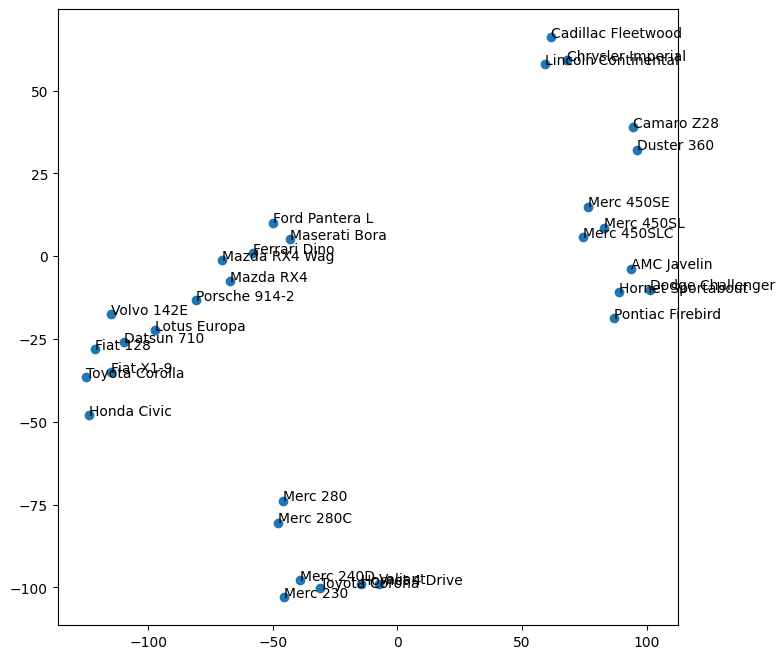

In [236]:
plt.figure(figsize = (8,8))
x, y = tsne['tsne1'].values, tsne['tsne2'].values
ax = plt.scatter(x,y)
for i, txt in enumerate(tsne.index):
    plt.annotate(txt, (x[i], y[i]), fontsize=10)

In [237]:
tsne['tsne1'].values[3]

array([-14.49516], dtype=float32)

### UMAP

Uniform Manifold Approximation and Projection 

In [238]:
import umap
reducer = umap.UMAP()
umap_df = reducer.fit_transform(feat)
umap_df

array([[15.969183, 10.045339],
       [15.765129,  9.657539],
       [14.861442, 10.827026],
       [17.429865, 11.439435],
       [19.15771 , 11.088597],
       [17.807064, 11.702914],
       [18.522852, 10.192925],
       [16.675924, 11.683575],
       [16.405872, 12.060739],
       [16.759212, 11.058285],
       [16.384302, 11.332061],
       [18.634945, 11.167157],
       [18.796917, 10.753123],
       [18.341131, 10.765735],
       [19.122522, 10.055237],
       [18.928246,  9.76126 ],
       [19.337553,  9.550477],
       [15.604082, 11.004671],
       [15.194815, 11.459611],
       [15.411861, 11.363637],
       [16.194553, 11.80147 ],
       [19.514174, 10.853371],
       [19.392473, 11.307103],
       [18.329098,  9.875955],
       [19.329155, 10.495343],
       [14.760338, 11.305584],
       [15.290446, 10.049079],
       [14.904529, 10.375531],
       [16.652634,  9.386841],
       [16.305222,  9.340151],
       [16.986897,  9.504938],
       [15.27073 , 10.765094]], dtype=f

In [239]:
umap_df = pd.DataFrame(umap_df, index = feat.index, columns= [['umap1', 'umap2']])
umap_df

,umap1,umap2
rownames,,
Mazda RX4,15.969183,10.045339
Mazda RX4 Wag,15.765129,9.657539
Datsun 710,14.861442,10.827026
Hornet 4 Drive,17.429865,11.439435
Hornet Sportabout,19.157709,11.088597
Valiant,17.807064,11.702914
Duster 360,18.522852,10.192925
Merc 240D,16.675924,11.683575
Merc 230,16.405872,12.060739


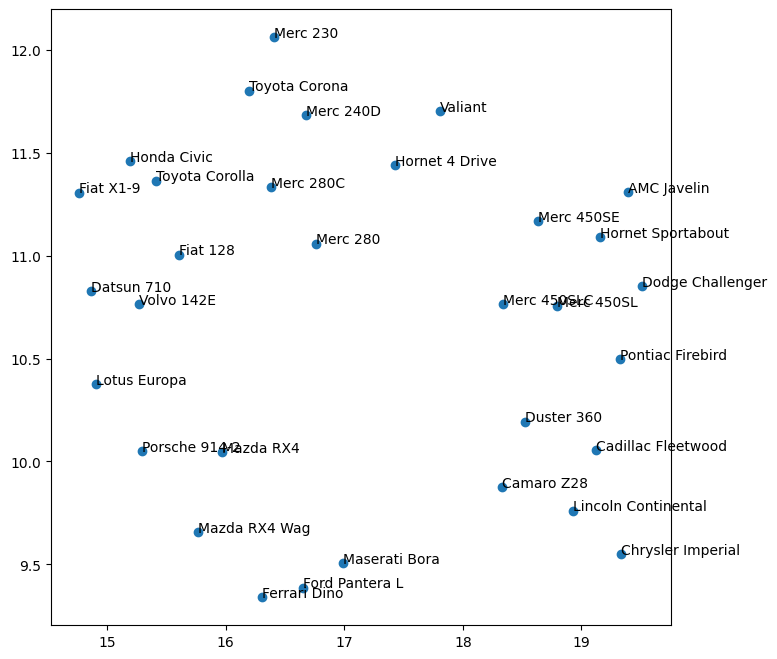

In [240]:
plt.figure(figsize = (8,8))
x, y = umap_df['umap1'].values, umap_df['umap2'].values
ax = plt.scatter(x,y)
for i, txt in enumerate(tsne.index):
    plt.annotate(txt, (x[i], y[i]), fontsize=10)